In [1]:
#import all dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 


In [2]:
#importing the data
crypto = pd.read_csv('crypto_data.csv')
crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#begin cleaning the data
#remove spaces from values 
crypto_df = crypto.replace(' ', '', regex=True)

#check data types 
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [4]:
#new df for only coins that are trading
crypto_trading = crypto_df.loc[crypto['IsTrading'] == True]

crypto_trading = crypto_trading.drop(['IsTrading'], axis=1)

crypto_trading.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
#removing rows with null values 
crypto_trading = crypto_trading.dropna(axis=0, how='any')

crypto_trading.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [6]:
#filtering for crypto's that have been mined 

mined_crypto = crypto_trading.loc[crypto_trading['TotalCoinsMined'] > 0]

mined_crypto.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [7]:
#converting total coin supply to numeric values 
coin_supply_df = pd.to_numeric(mined_crypto['TotalCoinSupply'].copy())

#new df without bad formatting 
converted_df = mined_crypto.drop(['TotalCoinSupply'], axis=1)

#reassigning column with reformatted values
converted_df['TotalCoinSupply'] = coin_supply_df

#checking data types 
converted_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [8]:
#pulling coin names columns if needed for later 
coin_names = converted_df[['Unnamed: 0', 'CoinName']]

#dropping coin name columns because they are not needed for analysis
converted_df = converted_df.drop(['Unnamed: 0', 'CoinName'], axis=1)

converted_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00


In [9]:
#converting string-value columns to numberic values 
dummie_df = pd.get_dummies(converted_df)

dummie_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GBAESPatternSearch,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_PoWandPoS,ProofType_Pos,ProofType_ProofofAuthority,ProofType_ProofofTrust,ProofType_TPoS,ProofType_Zero-KnowledgeProof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#scaling the data 
unscaled_features = dummie_df[['TotalCoinsMined', 'TotalCoinSupply']]

#generating and fitting scaler
scaler = StandardScaler().fit(unscaled_features.values)

#transforming the numeric values 
scaled_features = scaler.transform(unscaled_features.values)

#copying the df and applying scaled values 
scaled_df = dummie_df
scaled_df[['TotalCoinsMined', 'TotalCoinSupply']] = scaled_features

scaled_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GBAESPatternSearch,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_PoWandPoS,ProofType_Pos,ProofType_ProofofAuthority,ProofType_ProofofTrust,ProofType_TPoS,ProofType_Zero-KnowledgeProof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-0.093970,-0.145009,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0.524946,4.489424,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,-0.116715,-0.152560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.114747,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#beginning the PCA analysis 
pca = PCA(n_components=0.90)

#fit / transform the scaled data with the pca model 
pca_features = pca.fit_transform(scaled_df)

#observing transformed data 
pca_features[1]

print(f'Principal Components: {len(pca_features[0])}')
print(f'Number of Rows: {len(pca_features)}')

Principal Components: 12
Number of Rows: 532


In [12]:
#defining column names for reduced data
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']

#putting PCA data into a dataframe
pca_df = pd.DataFrame(data=pca_features, columns=cols)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.209438,-0.805134,0.174069,-0.666639,-0.020739,-0.026316,0.002434,-0.014987,-0.047212,-0.022222,-0.007972,0.015809
1,-0.187552,-0.807608,0.163647,-0.667332,-0.021488,-0.026179,0.002539,-0.015981,-0.047344,-0.022271,-0.007870,0.015907
2,3.529517,-0.310351,2.912131,0.430745,-0.165489,-0.259293,-0.278535,-0.150378,0.751045,0.354520,-0.234199,-0.070277
3,-0.179997,0.697041,-0.165453,0.232335,-0.279808,-0.615201,0.623943,-0.015440,0.027977,0.008647,-0.026053,-0.026505
4,-0.173130,0.690718,-0.153530,0.125072,-0.213149,-0.104532,-0.242102,0.005595,0.112281,-0.125739,0.058782,-0.129258


In [13]:
#using T-SNE to reduce the data
tsne = TSNE(learning_rate=250)

tsne_coin = tsne.fit_transform(pca_df)

tsne_coin.shape

(532, 2)

In [14]:
#putting T-SNE data into a dataframe
tsne_df = pd.DataFrame(data=tsne_coin, columns=['PC1', 'PC2'])
tsne_df.head()

,PC1,PC2
0,6.957226,21.683851
1,-0.153456,21.676830
2,-1.060636,0.195053
3,-16.254618,-25.300938
4,-0.917144,-22.924646


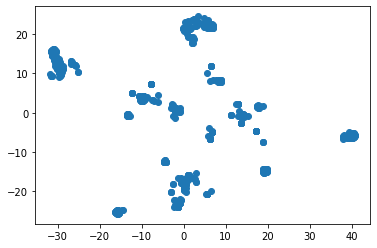

In [15]:
#plotting the T-SNE data, checking for clusters 
plt.scatter([tsne_coin[:,0]], [tsne_coin[:,1]])
plt.show()


In [19]:
#cluster analysis with K-Means

inertia = []
k = list(range(1,11))

#calculating inertia for each k value
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(tsne_coin)
    inertia.append(kmeans.inertia_)

#create elbow curve 
elbow = {'K': k, 'Inertia': inertia}
elbow_df = pd.DataFrame(elbow)
elbow_df


,K,Inertia
0,1,277519.406250
1,2,153991.796875
2,3,98820.695312
3,4,56845.453125
4,5,37414.082031
5,6,20707.382812
6,7,14829.308594
7,8,9691.330078
8,9,7128.277832
9,10,5667.519531


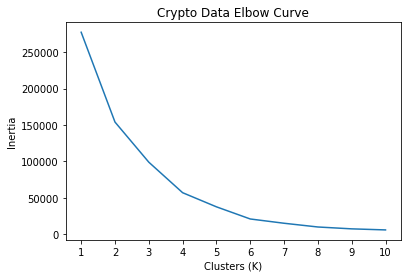

In [21]:
#plotting to find the best candidate(s) for K 
plt.plot(elbow_df['K'], elbow_df['Inertia'])
plt.xticks(range(1,11))
plt.xlabel('Clusters (K)')
plt.ylabel('Inertia')
plt.title('Crypto Data Elbow Curve')
plt.show()

#The plot below seems to indicate that the elbow is at K=6.

Recommendation 

Looking at the above analysis, I would recommend that the cryptos can be clustered together for investing analysis. After reducing dimensionality of the data to the greatest extent, this crypto data can be clustered into 6 clusters.